In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/incomeexpenditure-dataset/Inc_Exp_Data.csv")
df.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


In [3]:
df.shape

(50, 7)

In [4]:
LE=LabelEncoder()
df['Highest_Qualified_Member'] = df['Highest_Qualified_Member'].astype(str)
df['Highest_Qualified_Member'] = LE.fit_transform(df['Highest_Qualified_Member'])

In [5]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df),columns= df.columns )
scaled_X = scaled_df[['Mthly_HH_Income','Mthly_HH_Expense']]

In [6]:
scaled_df.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,-1.415024,-0.903857,-0.705664,-0.171557,-1.343624,1.414601,-0.632815
1,-1.376317,-0.987408,-1.371384,-0.009711,-1.294021,-0.463188,-0.632815
2,-1.221492,-1.196287,-1.371384,-0.495249,-1.190272,1.414601,-0.632815
3,-1.221492,-1.405165,-2.037105,-0.495249,-1.239496,-0.463188,-0.632815
4,-1.124727,-0.569652,-1.371384,-0.009711,-1.082358,-1.089118,-0.632815


In [7]:
X = df[['Mthly_HH_Income','Mthly_HH_Expense']]

Elbow Method to determine the number of clusters to be formed:


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

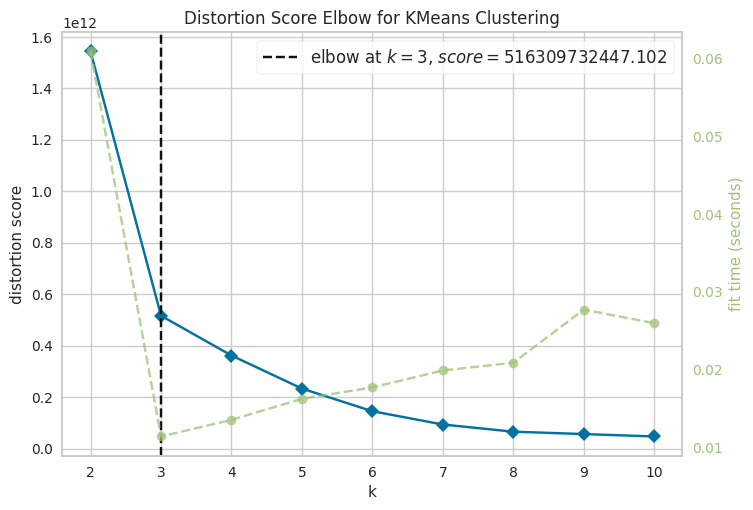

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df)
Elbow_M.show()

In [9]:
AC = AgglomerativeClustering(n_clusters=3)
yhat_df = AC.fit_predict(scaled_X)
df["Clusters"] = yhat_df
#Adding the Clusters feature to the orignal dataframe.
# data["Clusters"]= yhat_AC

In [10]:
df

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members,Clusters
0,5000,8000,3,2000,64200,4,1,2
1,6000,7000,2,3000,79920,1,1,2
2,10000,4500,2,0,112800,4,1,2
3,10000,2000,1,0,97200,1,1,2
4,12500,12000,2,3000,147000,0,1,2
5,14000,8000,2,0,196560,0,1,2
6,15000,16000,3,35000,167400,2,1,2
7,18000,20000,5,8000,216000,0,1,2
8,19000,9000,2,0,218880,4,1,2
9,20000,9000,4,0,220800,4,2,2


In [11]:
df['Clusters'].value_counts()

Clusters
1    21
2    18
0    11
Name: count, dtype: int64

In [12]:
averagediff0 = np.mean(df.loc[df['Clusters'] == 0]['Mthly_HH_Income'] 
                      - df.loc[df['Clusters'] == 0]['Mthly_HH_Expense']) 
averagediff0

44090.90909090909

In [13]:
averagediff1 = np.mean(df.loc[df['Clusters'] == 1]['Mthly_HH_Income'] 
                      - df.loc[df['Clusters'] == 1]['Mthly_HH_Expense']) 
averagediff1

24523.809523809523

In [14]:
averagediff2 = np.mean(df.loc[df['Clusters'] == 2]['Mthly_HH_Income'] 
                      - df.loc[df['Clusters'] == 2]['Mthly_HH_Expense']) 
averagediff2

7611.111111111111

In [15]:
family_members_noise = np.random.normal(loc=2, scale=2, size=(1,50))
abs(family_members_noise.round()).astype(int)


array([[3, 2, 2, 6, 1, 1, 2, 3, 3, 0, 0, 5, 3, 3, 0, 1, 1, 3, 1, 1, 1, 4,
        5, 0, 7, 2, 2, 1, 4, 4, 4, 6, 3, 0, 0, 4, 3, 2, 1, 1, 1, 0, 3, 3,
        4, 1, 4, 1, 0, 3]])

In [16]:
def generate_noise_gen():
    gen_noise = np.random.normal(loc=100, scale=5000, size=(1,50))
    g = abs(gen_noise.round()).astype(int)
    return g[0]


In [17]:
def generate_noise_No_of_Fly_Members():
    arr = [1,2,3,4]
    g = np.random.choice(arr)
    return g


In [18]:
def generate_noise_Highest_Qualified_Member():
    arr = [0,1]
    g = np.random.choice(arr)
    return g


In [19]:
def generate_noise_No_of_Earning_Members():
    arr = [0,4]
    g = np.random.choice(arr)
    return g

In [20]:
daata = pd.DataFrame()
for i in range(200): 
    df = daata
    m = df['Mthly_HH_Income'] + generate_noise_gen()
    a = df['Mthly_HH_Expense'] + generate_noise_gen()
    r= df['No_of_Fly_Members'] + generate_noise_No_of_Fly_Members()
    i= df['Emi_or_Rent_Amt'] + generate_noise_gen()
    a= df['Annual_HH_Income'] + generate_noise_gen()
    aa= df['Highest_Qualified_Member'] + generate_noise_Highest_Qualified_Member()
    aaa= df['No_of_Earning_Members'] + generate_noise_No_of_Earning_Members()
    
    # Convert the columns to pandas Series
    col1_series = pd.Series(m)
    col2_series = pd.Series(a)
    col3_series = pd.Series(r)
    col4_series = pd.Series(i)
    col5_series = pd.Series(a)
    col6_series = pd.Series(aa)
    col7_series = pd.Series(aaa)

    # Create a dictionary where each key-value pair corresponds to a column in the DataFrame
    data = {'Mthly_HH_Income': col1_series, 'Mthly_HH_Expense': col2_series, 'No_of_Fly_Members': col3_series, 'Emi_or_Rent_Amt': col4_series, 'Annual_HH_Income': col5_series, 'Highest_Qualified_Member': col6_series, 'No_of_Earning_Members': col7_series}

    # Create a DataFrame from the dictionary
    df = pd.DataFrame(data)
    daata = df + daata


KeyError: 'Mthly_HH_Income'

In [ ]:
augmented_data